# simple ODE by scipy

The code below solves a system of two first-order ODEs with initial conditions. The system of ODEs is:

y1' = y2
y2' = -y1

The method used to solve this system is the solve_ivp function from the scipy.integrate module. It uses an adaptive step size Runge-Kutta method of order 5(4) to integrate the system of ODEs. The final solution plotted on the graph is a plot of the solutions for y1 and y2 over the time domain [0, 10], along with the reference solutions sin(t) and cos(t), respectively.

Total time of run: 0.0039904117584228516
Total time of run: 0.0
Total time of run: 0.0
Total time of run: 0.0


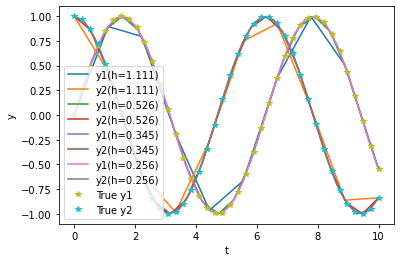

In [15]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
import time
plt.figure()
for i in range(1,5):
    s = time.time()
    def ode_system(t, y):
        return np.array([y[1], -y[0]])

    t_eval = np.linspace(0, 10, num=10*i)
    sol = solve_ivp(ode_system, (0, 10), [0, 1], t_eval=t_eval)

    e = time.time()
    print('Total time of run:',e - s)
    plt.plot(sol.t, sol.y[0], '-', label="y1(h={})".format(round(t_eval[1]-t_eval[0],3)))
    plt.plot(sol.t, sol.y[1], '-', label="y2(h={})".format(round(t_eval[1]-t_eval[0],3)))
   
    plt.legend()
    plt.xlabel('t')
    plt.ylabel('y')
plt.plot(sol.t, np.sin(sol.t), '*', label='True y1')
plt.plot(sol.t, np.cos(sol.t), '*', label='True y2')
plt.legend()

Total time of run: 0.003988027572631836


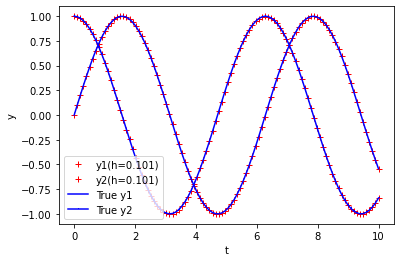

In [23]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
import time

s = time.time()
def ode_system(t, y):
    return np.array([y[1], -y[0]])

t_eval = np.linspace(0, 10, num=100)
sol = solve_ivp(ode_system, (0, 10), [0, 1], t_eval=t_eval)

e = time.time()
print('Total time of run:',e - s)
plt.plot(sol.t, sol.y[0], 'r+', label="y1(h={})".format(round(t_eval[1]-t_eval[0],3)))
plt.plot(sol.t, sol.y[1], 'r+', label="y2(h={})".format(round(t_eval[1]-t_eval[0],3)))
plt.plot(sol.t, np.sin(sol.t), 'b-', label='True y1')
plt.plot(sol.t, np.cos(sol.t), 'b-,', label='True y2')
plt.legend()
plt.xlabel('t')
plt.ylabel('y')
plt.show()


# Simple ODE by DEEPxde

This code solves the same second-order ordinary differential equation system:

y1'(x) = y2(x)
y2'(x) = -y1(x)

The ode_system function defines this system and uses the dde.grad.jacobian function from the deepxde library to compute the first-order partial derivatives of y1 and y2 with respect to x. The boundary function returns True for initial boundary conditions.

The func function defines the exact solution of the ODE system, which is:

y1(x) = sin(x)
y2(x) = cos(x)

The numerical method used to solve the ODE system is the deep learning-based solver implemented in the deepxde library.

The final solution graph shows the learned solution (red) and the exact solution (blue) of the ODE system over the domain [0,10]. The learned solution is a close approximation of the exact solution with a small relative error.

Using backend: tensorflow.compat.v1



Instructions for updating:
non-resource variables are not supported in the long term

Compiling model...
Building feed-forward neural network...


C:\Users\mayur\anaconda3\lib\site-packages\deepxde\nn\tensorflow_compat_v1\fnn.py:103: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  return tf.layers.dense(


'build' took 0.253375 s

'compile' took 2.824841 s

Initializing variables...
Training model...

Step      Train loss                                  Test loss                                   Test metric   
0         [7.89e-03, 6.36e-02, 0.00e+00, 1.00e+00]    [7.34e-03, 6.45e-02, 0.00e+00, 1.00e+00]    [1.08e+00]    
1000      [8.72e-03, 7.25e-03, 6.99e-08, 3.25e-04]    [9.84e-03, 7.14e-03, 6.99e-08, 3.25e-04]    [7.84e-01]    
2000      [6.18e-03, 4.61e-03, 2.63e-07, 1.44e-04]    [6.60e-03, 4.72e-03, 2.63e-07, 1.44e-04]    [6.55e-01]    
3000      [3.19e-03, 3.61e-03, 7.03e-07, 7.16e-05]    [3.33e-03, 3.73e-03, 7.03e-07, 7.16e-05]    [4.85e-01]    
4000      [1.87e-03, 2.51e-03, 5.79e-07, 3.29e-05]    [2.01e-03, 2.37e-03, 5.79e-07, 3.29e-05]    [3.61e-01]    
5000      [9.75e-04, 1.43e-03, 4.27e-09, 5.11e-05]    [1.04e-03, 1.23e-03, 4.27e-09, 5.11e-05]    [2.43e-01]    
6000      [4.71e-04, 7.29e-04, 1.99e-06, 6.90e-06]    [5.32e-04, 5.52e-04, 1.99e-06, 6.90e-06]    [1.55e-01]    

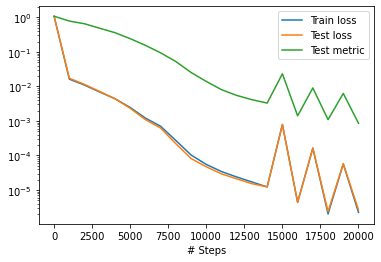

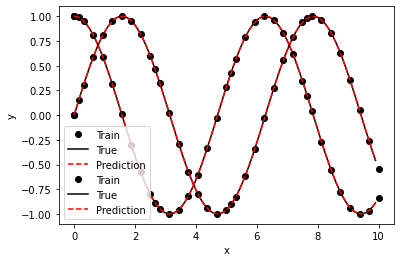

In [3]:
import deepxde as dde
import numpy as np
import time

s = time.time()

def ode_system(x, y):
    """ODE system.
    dy1/dx = y2
    dy2/dx = -y1
    """
    y1, y2 = y[:, 0:1], y[:, 1:]
    dy1_x = dde.grad.jacobian(y, x, i=0)
    dy2_x = dde.grad.jacobian(y, x, i=1)
   
    return [dy1_x - y2, dy2_x + y1]


def boundary(_, on_initial):
    return on_initial


def func(x):
    """
    y1 = sin(x)
    y2 = cos(x)
    """
    return np.hstack((np.sin(x), np.cos(x)))


geom = dde.geometry.TimeDomain(0, 10)
ic1 = dde.icbc.IC(geom, lambda x: 0, boundary, component=0)
ic2 = dde.icbc.IC(geom, lambda x: 1, boundary, component=1)
data = dde.data.PDE(geom, ode_system, [ic1, ic2], 35, 2, solution=func, num_test=100)

layer_size = [1] + [50] * 3 + [2]
activation = "tanh"
initializer = "Glorot uniform"
net = dde.nn.FNN(layer_size, activation, initializer)

model = dde.Model(data, net)
model.compile("adam", lr=0.001, metrics=["l2 relative error"])
losshistory, train_state = model.train(iterations=20000)

e = time.time()
print('Total time of run:',e - s)

dde.saveplot(losshistory, train_state, issave=True, isplot=True)